<a href="https://colab.research.google.com/github/mrunallll/Flipr-Hackathon--Stock-Prediction/blob/master/Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#import pandas_profiling
from pandas import DataFrame
import seaborn as sns
import warnings
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
up=files.upload()

#Exploratory Data Analysis

In [3]:
train_data=pd.read_excel('Train_dataset.xlsx')
test_data=pd.read_excel('Test_dataset.xlsx')

In [4]:
train_data.shape

(7383, 15)

In [5]:
test_data.shape

(3331, 14)

In [ ]:
train_data.describe()

VWAP  General Index  ...    P/B Ratio  Stock Price
count  7345.000000    7321.000000  ...  7358.000000  7383.000000
mean    486.188167   24218.079195  ...     4.996782   569.522650
std     278.280638   19602.174448  ...     2.616719   423.896621
min       5.250000    3351.280000  ...     0.450000    10.573482
25%     247.100000   11270.150000  ...     2.762500   223.516594
50%     488.380000   12765.840000  ...     5.020000   458.716483
75%     724.020000   38182.080000  ...     7.217500   827.927051
max     965.210000   55722.000000  ...     9.560000  1970.400563

[8 rows x 12 columns]

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(train_data, title="Report of Train Data", html={'style': {'full_width': True}}, sort="None")
profile.to_notebook_iframe()

#Visualising feature plots

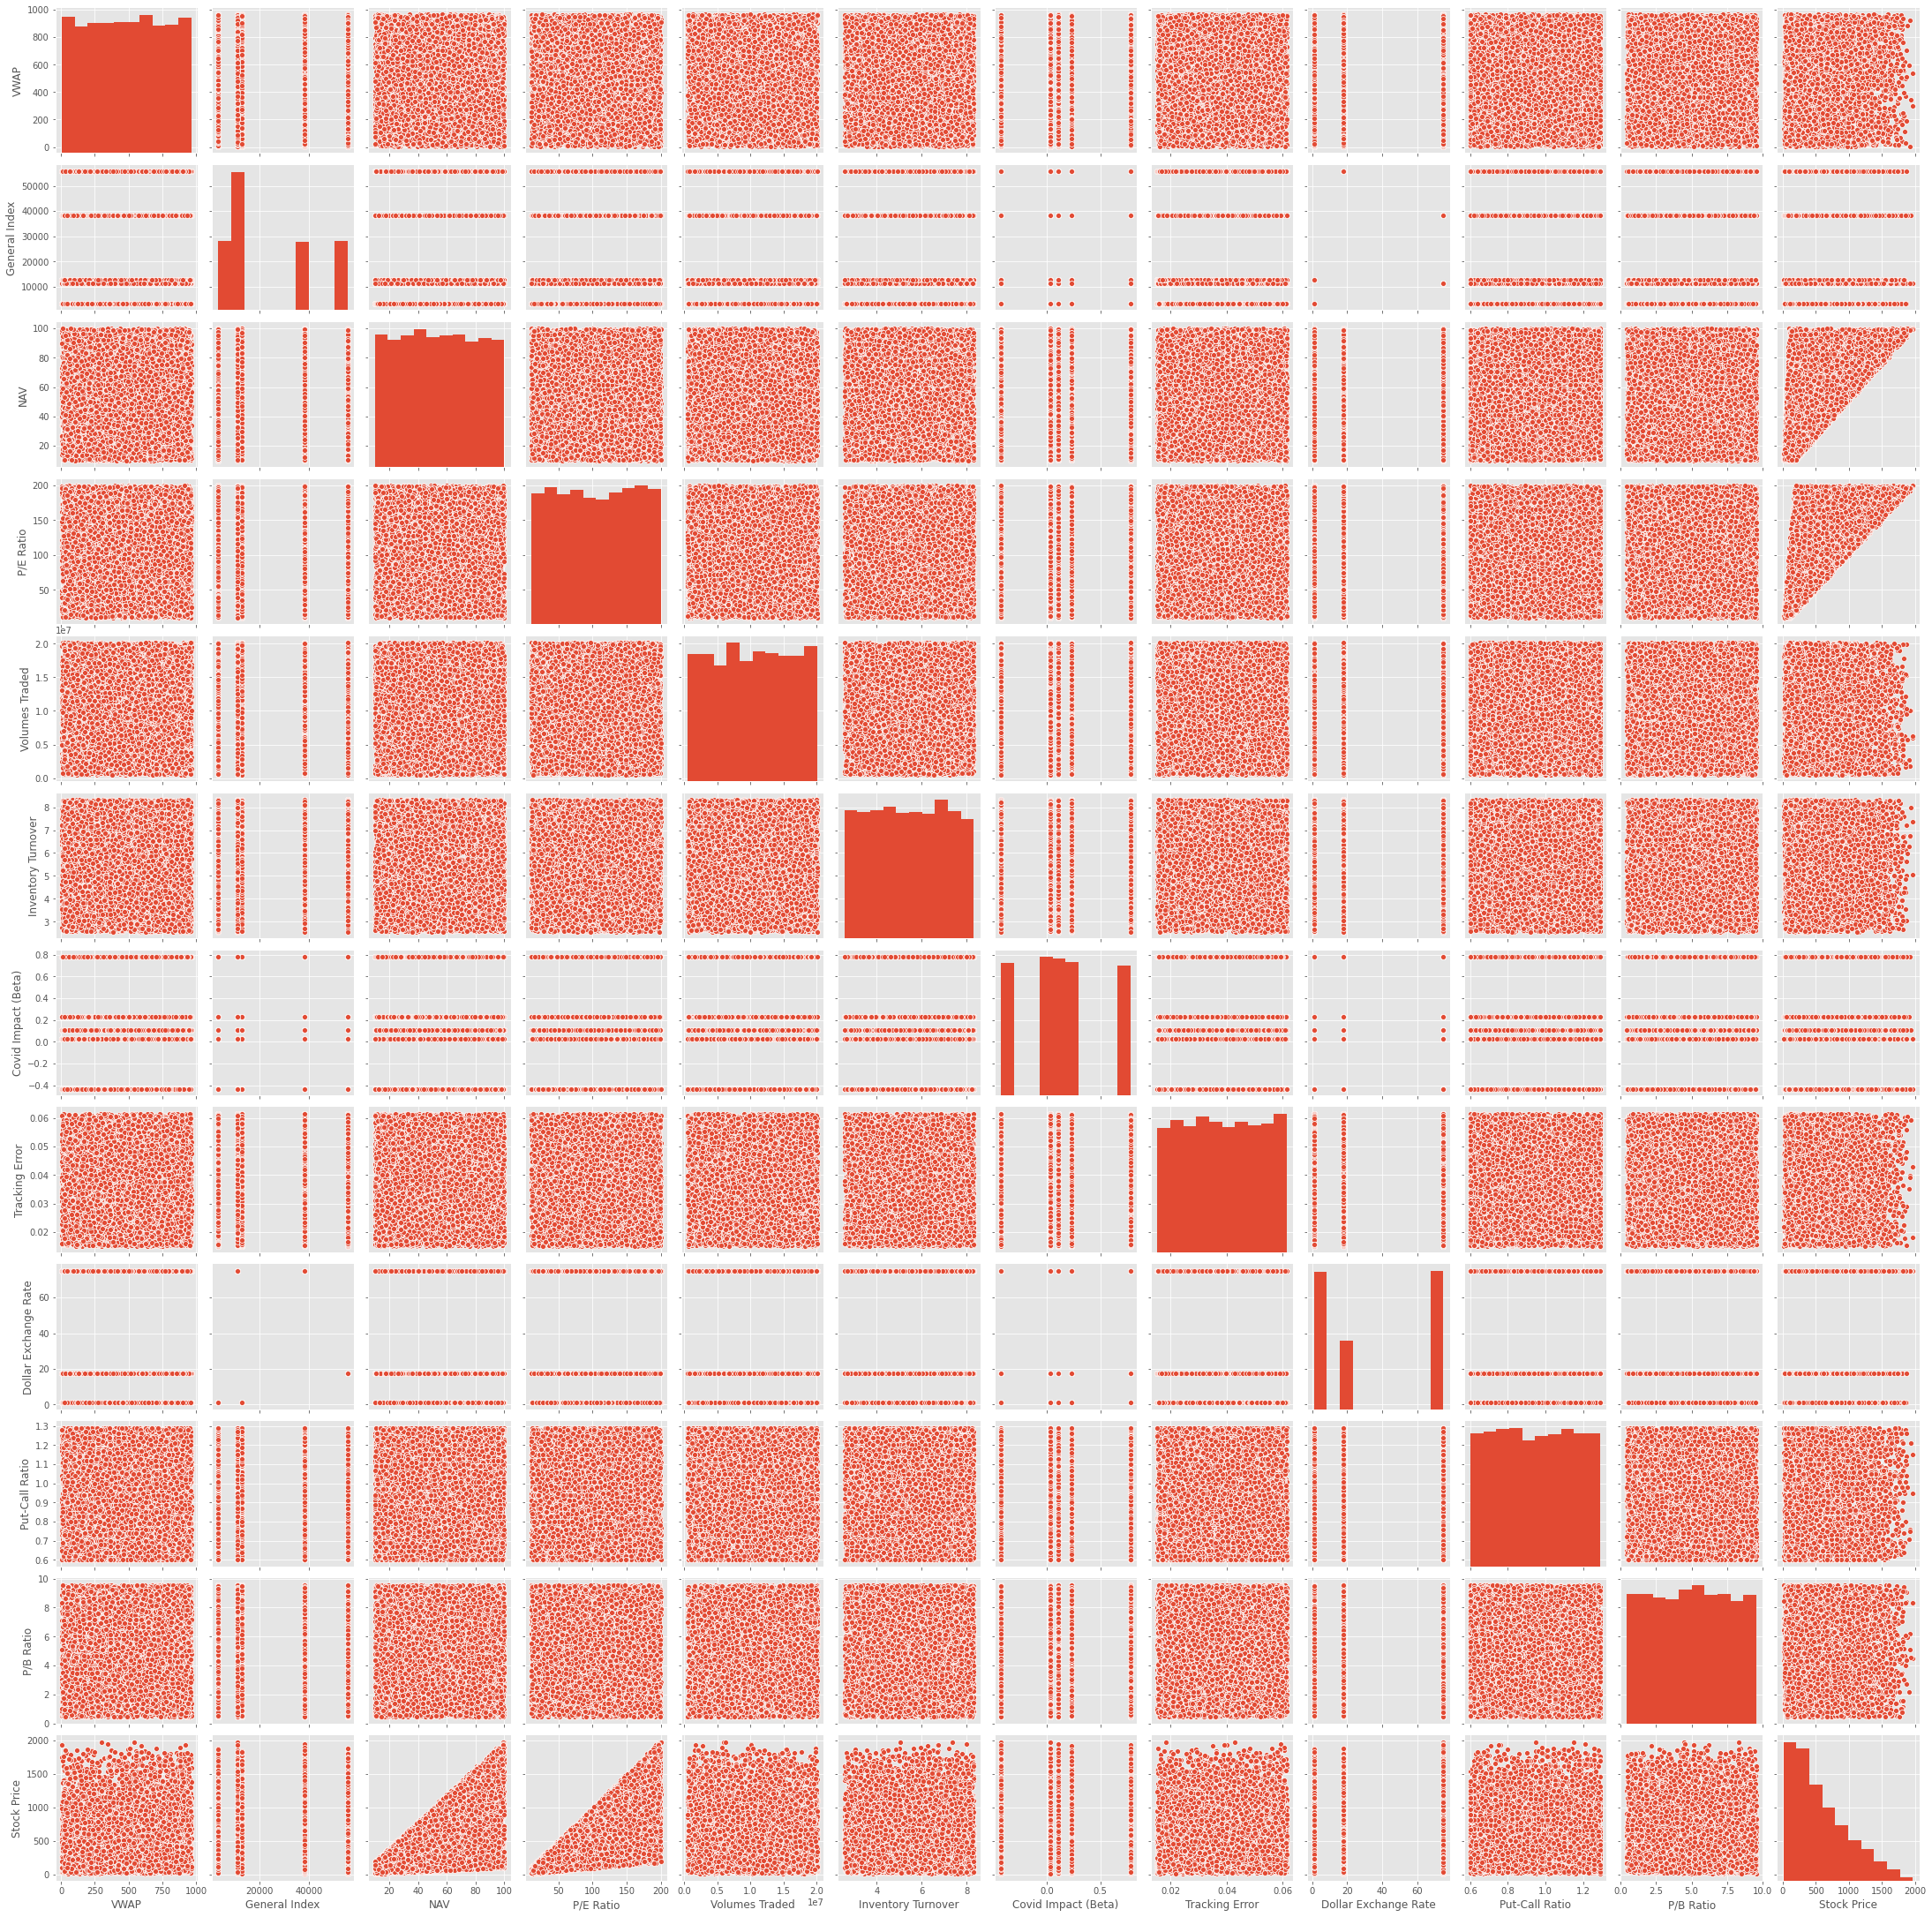

In [ ]:
sns.pairplot(train_data)

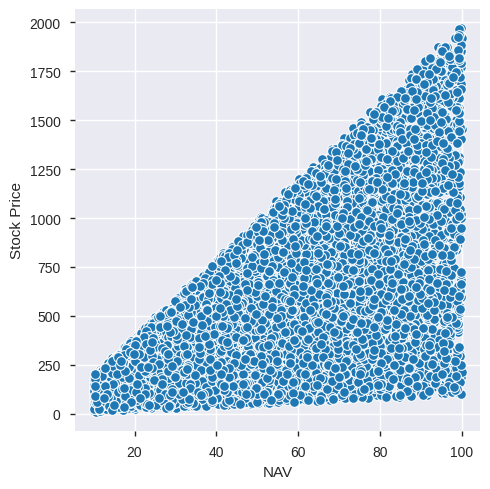

In [ ]:
sns.relplot('NAV', 'Stock Price', data=train_data)

In [ ]:
sns.relplot('P/E Ratio', 'Stock Price', data=train_data, hue= 'Index', style= 'Industry')

In [ ]:
sns.relplot('P/B Ratio', 'Stock Price', data=train_data, hue= 'Index', style= 'Industry')

In [ ]:
sns.relplot('Put-Call Ratio', 'Stock Price', data=train_data, hue= 'Industry', style= 'Index')

#Data Preprocessing

1. Missing Values
2. Drop unnecessary cols
3. Feature Scaling (Not req since Random Forest model used)
4. Feature Selection

## Handling Missing Values

In [6]:
#dropping rows that do not have at least 13 true (not nan) values
train_data.dropna(thresh=13, inplace=True, axis=0)
train_data.shape

(7296, 15)

In [7]:
train_data.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                      8
General Index            24
NAV                      25
P/E Ratio               181
Volumes Traded          224
Inventory Turnover      368
Covid Impact (Beta)     330
Tracking Error           28
Dollar Exchange Rate     36
Put-Call Ratio           40
P/B Ratio                23
Stock Price               0
dtype: int64

In [14]:
train_data["General Index"] = train_data.groupby("Index").transform(lambda x: x.fillna(x.mean()))["General Index"]
test_data["General Index"] = test_data.groupby("Index").transform(lambda x: x.fillna(x.mean()))["General Index"]

In [15]:
train_data["Dollar Exchange Rate"] = train_data.groupby("Index").transform(lambda x: x.fillna(x.mean()))["Dollar Exchange Rate"]
test_data["Dollar Exchange Rate"] = test_data.groupby("Index").transform(lambda x: x.fillna(x.mean()))["Dollar Exchange Rate"]

In [11]:
train_data["Covid Impact (Beta)"] = train_data.groupby("Industry").transform(lambda x: x.fillna(x.mean()))["Covid Impact (Beta)"]
test_data["Covid Impact (Beta)"] = test_data.groupby("Industry").transform(lambda x: x.fillna(x.mean()))["Covid Impact (Beta)"]

In [8]:
train_data["P/B Ratio"] = train_data.groupby("Industry").transform(lambda x: x.fillna(x.median()))["P/B Ratio"]
test_data["P/B Ratio"] = test_data.groupby("Industry").transform(lambda x: x.fillna(x.median()))["P/B Ratio"]

In [16]:
train_data.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                      8
General Index             0
NAV                      25
P/E Ratio               181
Volumes Traded          224
Inventory Turnover      368
Covid Impact (Beta)       0
Tracking Error           28
Dollar Exchange Rate      0
Put-Call Ratio           40
P/B Ratio                 0
Stock Price               0
dtype: int64

In [17]:
test_data.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     12
General Index             0
NAV                     275
P/E Ratio               292
Volumes Traded           48
Inventory Turnover       30
Covid Impact (Beta)       0
Tracking Error          126
Dollar Exchange Rate      0
Put-Call Ratio          429
P/B Ratio                 0
dtype: int64

In [18]:
lol=[3, 10, 12]
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy='mean')
for i in lol:
  imp = imp.fit(train_data.iloc[:, i:i+1])
  train_data.iloc[:, i:i+1] = imp.transform(train_data.iloc[:, i:i+1])
  impu = imp.fit(test_data.iloc[:, i:i+1])
  test_data.iloc[:, i:i+1] = impu.transform(test_data.iloc[:, i:i+1])

In [19]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy='median')
imp = imp.fit(train_data.iloc[:, 5:9])
train_data.iloc[:, 5:9] = imp.transform(train_data.iloc[:, 5:9])
impu = imp.fit(test_data.iloc[:, 5:9])
test_data.iloc[:, 5:9] = imp.transform(test_data.iloc[:, 5:9])

#Dropping Redundant Columns
1. Industry-- highly correlated with Covid Impact
2. Stock Index-- not required
3. Index-- highly correlated to General Index & Dollar Exchange Rate

In [20]:
train_data.drop(columns=['Stock Index', 'Index', 'Industry'], inplace=True)
test_data.drop(columns=['Stock Index', 'Index', 'Industry'], inplace=True)

In [21]:
test_data.head()

VWAP  General Index  ...  Put-Call Ratio  P/B Ratio
0   53.30       11270.15  ...        0.800000       4.66
1  749.34       55722.00  ...        0.860000       6.11
2  567.75        3351.28  ...        0.930000       4.99
3  646.78       11270.15  ...        1.090000       1.26
4  380.33       12765.84  ...        0.938828       6.18

[5 rows x 11 columns]

In [22]:
X_train= train_data.iloc[:, :-1].values
y_train= train_data.iloc[:, -1].values
X_test= test_data.iloc[:, :].values

#Feature Selection


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

#mutual_info_gain is information gain in decision trees, random forest

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.003928
Feature 1: 0.000000
Feature 2: 0.463770
Feature 3: 0.589099
Feature 4: 0.004516
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.002459
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.000000


In [26]:
train_data.head(1)

VWAP  General Index    NAV  ...  Put-Call Ratio  P/B Ratio  Stock Price
0  700.29       12765.84  32.38  ...            0.61        9.2   156.987852

[1 rows x 12 columns]

#Model fitting, selection and hyper paramter tuning

Random Forest Model


In [73]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators=200, random_state =0)
ran.fit(X_train, y_train)
y_pred_ran=ran.predict(X_test)

from sklearn.model_selection import cross_val_score
r2 = cross_val_score(ran, X_train, y_train, cv=10, scoring='r2')
r2_mean=np.mean(r2)
print(r2_mean)

0.9805448800224383


Decision Tree Regressor

In [62]:
#We are not using this model, but gives good performance
'''
from sklearn.tree import DecisionTreeRegressor
dec_tree= DecisionTreeRegressor(max_depth=7, max_features=11, criterion='mse')
dec_tree.fit(X_train, y_train)
y_pred_dt=dec_tree.predict(X_test)

from sklearn.model_selection import cross_val_score
r2 = cross_val_score(dec_tree, X_train, y_train, cv=10, scoring='r2')
r2_mean=np.mean(r2)
print(r2_mean)
'''

0.9674626370016934


In [ ]:
#DONE

In [ ]:
#Evaluating Other models, 
#CONCLUSION-Random Forest performs best of all.

Linear Reression Model

In [47]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr=linreg.predict(X_test)

from sklearn.model_selection import cross_val_score
r2 = cross_val_score(linreg, X_train, y_train, cv=10, scoring='r2')
r2_mean=np.mean(r2)
print(r2_mean)

0.8718029731357937


Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
para={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
scores = {
    'r2': 'r2',
    'nmse': 'neg_mean_squared_error'
}
ridge_regressor=GridSearchCV(ridge, para, refit='r2', scoring=scores, cv=10)
ridge_regressor.fit(X_train,y_train)
y_pred_ridge= ridge_regressor.predict(X_test)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print(ridge_regressor.cv_results_['mean_test_r2'])
print(ridge_regressor.cv_results_['mean_test_nmse'])

Lasso Regression Model

In [69]:
from sklearn.linear_model import Lasso

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
scores = {
    'r2': 'r2',
    'nmse': 'neg_mean_squared_error'
}
lasso_regressor=GridSearchCV(lasso, parameters, refit='r2', scoring=scores, cv=10)
lasso_regressor.fit(X_train,y_train)
y_pred_lasso= lasso_regressor.predict(X_test)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
print(lasso_regressor.cv_results_['mean_test_r2'])
print(lasso_regressor.cv_results_['mean_test_nmse'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75450426.04059485, tolerance: 117749.09168962114
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76698294.1949997, tolerance: 118954.2309025563
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77557778.55002932, tolerance: 118116.75091418708
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77142708.47

{'alpha': 10}
0.8718843694821402
[0.87180297 0.87180297 0.87180297 0.87180483 0.87181885 0.87186281
 0.87187286 0.87188437 0.87188087 0.87187426 0.87187113 0.87186937
 0.87186688 0.87186366 0.87186036 0.8718103 ]
[-23237.85573481 -23237.85573478 -23237.85573178 -23237.50949295
 -23234.91993819 -23226.79215193 -23225.21090131 -23223.30303539
 -23224.17363846 -23225.60086867 -23226.27450289 -23226.69025677
 -23227.23671197 -23227.91396286 -23228.61287654 -23238.66522483]


Polynomial Regression Model

In [49]:
from sklearn.preprocessing import PolynomialFeatures
polyreg= PolynomialFeatures(degree=5)
X_poly= polyreg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
X_test_poly= polyreg.fit_transform(X_test)

y_pred_poly= lin_reg.predict(X_test_poly)
r2 = cross_val_score(lin_reg, X_poly, y_train, cv=10, scoring='r2')
r2_mean=np.mean(r2)
print(r2_mean)

0.46440984419631787


In [ ]:
#CONCLUSION-
#RANDOM FOREST PERFORMS BEST

In [70]:
df_las=pd.DataFrame(y_pred_lasso)

In [65]:
df=pd.DataFrame(y_pred_dt)

In [74]:
df_ran=pd.DataFrame(y_pred_ran)

In [ ]:
pip uninstall pandas_profiling

Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
pip install pandas-profiling[notebook,html]

     |████████████████████████████████| 266kB 3.5MB/s 
     |████████████████████████████████| 604kB 10.5MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 3.1MB 16.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 112kB 40.6MB/s 
     |████████████████████████████████| 296kB 36.7MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=7f917aa2b4e6caf29a5e72b35176d4cdc384aa8eb827e5141bd5cccbc8114111
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=2f8bc7566b314e8e146740b3a6dc0e82e18708a5bb87f01ae57c11a74cc9398b
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin ima